In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [ ]:
df.head(5)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df["Fuel_Type"].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


There is no inconsistency in the datatype and no null values in the data

# **Normalization**

In [ ]:
df_num=df.select_dtypes(include='int64')
df_num.values

array([[13500,    23, 46986, ...,     4,     5,  1165],
       [13750,    23, 72937, ...,     4,     5,  1165],
       [13950,    24, 41711, ...,     4,     5,  1165],
       ...,
       [ 8500,    71, 17016, ...,     4,     5,  1015],
       [ 7250,    70, 16916, ...,     4,     5,  1015],
       [ 6950,    76,     1, ...,     4,     5,  1114]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
arr=df_num.values
sc.fit(arr)

StandardScaler()

In [ ]:
sc.transform(arr)

array([[ 0.76376268, -1.77196633, -0.57469494, ...,  0.        ,
        -0.14042519,  1.75856113],
       [ 0.83271485, -1.77196633,  0.11745379, ...,  0.        ,
        -0.14042519,  1.75856113],
       [ 0.88787659, -1.71818412, -0.71538641, ...,  0.        ,
        -0.14042519,  1.75856113],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ...,  0.        ,
        -0.14042519, -1.09191497],
       [-0.96004167,  0.75579727, -1.37670303, ...,  0.        ,
        -0.14042519, -1.09191497],
       [-1.04278428,  1.0784905 , -1.82784925, ...,  0.        ,
        -0.14042519,  0.78939926]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])

# **Encoding of Fuel_Type columns**

In [ ]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [ ]:
df['Cylinders'].unique()

array([4])

In [ ]:
df.drop(['Cylinders'],axis=1,inplace=True)

cylinder have only 1 uniques value and removing this column does not really effect the price

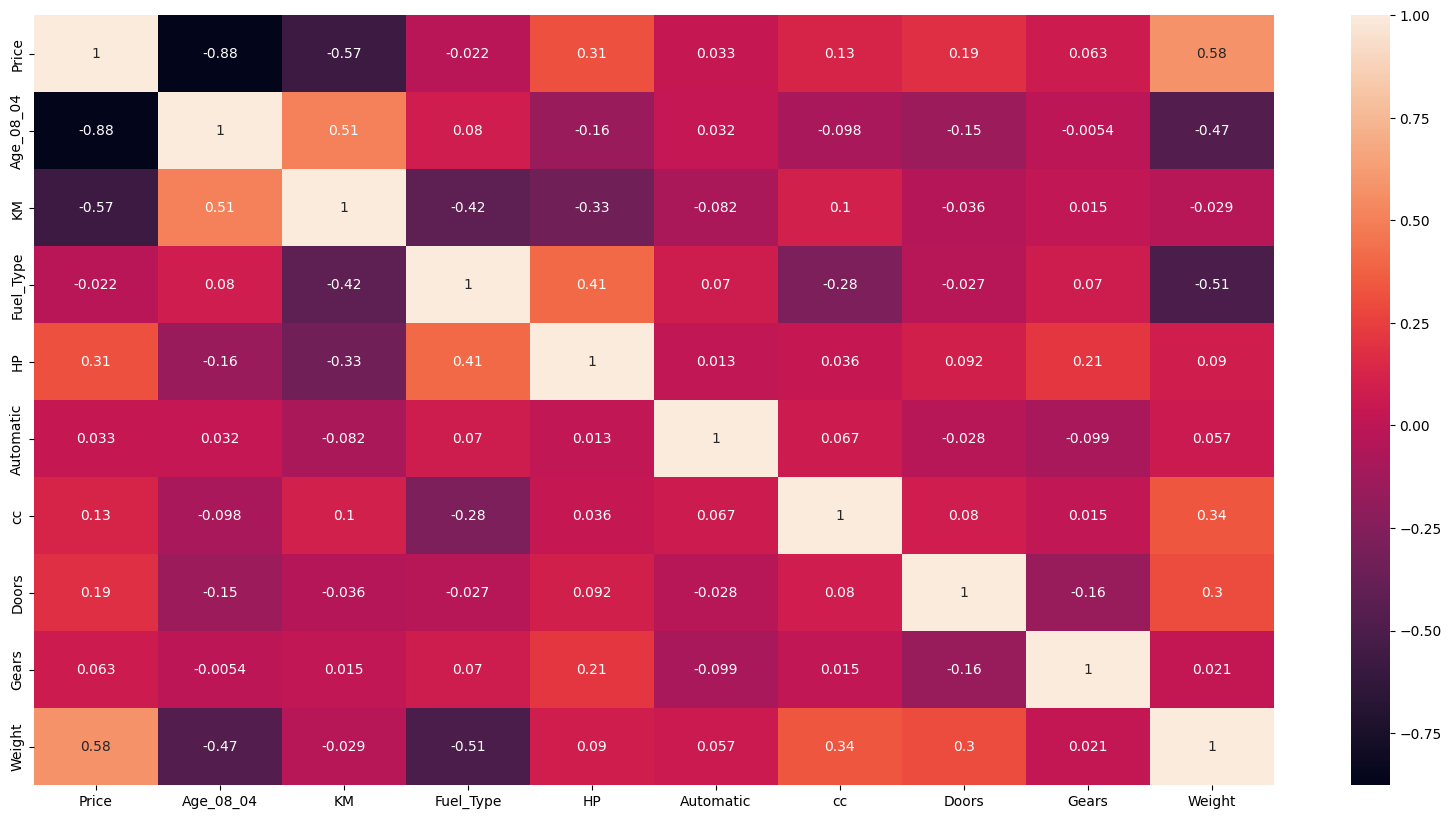

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True) #gives the coorelation between the columns
plt.show()

In [ ]:
df.corr()  #gives the coorelation between the columns

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,-0.505303,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


## whole model

In [ ]:
from sklearn.model_selection import train_test_split

#selecting independent features for predicting dependent feature
X=df[['Age_08_04', 'KM', 'Fuel_Type','HP','Automatic','cc','Doors','Gears','Weight']]

#dependent variable
y=df['Price']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr= LinearRegression()

#selecting independent features for predicting dependent feature
X=df[['Age_08_04', 'KM', 'Fuel_Type','HP','Automatic','cc','Doors','Gears','Weight']]

#dependent variable
y=df['Price']

lr.fit(X,y)

LinearRegression()

In [ ]:
print(lr.coef_,lr.intercept_)

[-1.23782928e+02 -1.75382510e-02  5.77717760e+02  2.36690822e+01
  3.02099218e+02 -5.69348080e-02 -2.99178282e+01  6.22016846e+02
  2.07731620e+01] -9835.091483539883


In [ ]:
y_pred= lr.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(lr.score(X,y))
print("r2 score:",r2)
print("rmse:",rmse)

0.8649079530580607
r2 score: 0.8649079530580607
rmse: 1332.6218711635413


#Expression 1

In [ ]:
X=df[['KM','Fuel_Type','Weight']] #selected few columns having -ve corerlation and 1 +ve coorelation
y=df['Price']

lr.fit(X,y)

LinearRegression()

In [ ]:
print(lr.score(X,y))

0.6459118614501613


In [ ]:
print(lr.coef_,lr.intercept_)

[-5.12324110e-02  5.37997126e+02  4.09193860e+01] -30647.625538465225


In [ ]:
y_pred= lr.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(lr.score(X,y))
print("r2 score:",r2)
print("rmse:",rmse)

0.6459118614501613
r2 score: 0.6459118614501613
rmse: 2157.4847515679894


#Expression 2

In [ ]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,-0.505303,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


In [ ]:
X=df[['HP','Gears','Weight']] #selected few columns having +ve coorelation
y=df['Price']

lr.fit(X,y)

print(lr.coef_,lr.intercept_)

[ 64.37271933 -78.59477064  38.40851206] -36599.66519197785


In [ ]:
y_pred= lr.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(lr.score(X,y))
print("r2 score:",r2)
print("rmse:",rmse)

0.4074859150209036
r2 score: 0.4074859150209036
rmse: 2790.8814230590615


#Expression 3

In [ ]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,-0.505303,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


In [ ]:
X=df[['HP','Gears','Weight','KM','Fuel_Type',]] #selected few columns having 2 -ve corerlation and 3 +ve coorelation
y=df['Price']

lr.fit(X,y)

print(lr.coef_,lr.intercept_)


[ 1.89559544e+01  8.22222888e+02  3.86238587e+01 -5.09148132e-02
  4.51455813e+01] -33343.63653497007


In [ ]:
y_pred= lr.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(lr.score(X,y))
print("r2 score:",r2)
print("rmse:",rmse)

0.6531545161128742
r2 score: 0.6531545161128742
rmse: 2135.3057405955396


# expression 4

In [ ]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,-0.505303,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


In [ ]:
X=df[['Age_08_04','KM','Fuel_Type','Gears','Weight']] #selected few columns having 3-ve corerlation and 2 +ve coorelation
y=df['Price']

lr.fit(X,y)

print(lr.coef_,lr.intercept_)
print(lr.score(X,y))

[-1.22482248e+02 -1.89857694e-02  1.09361960e+03  9.22709460e+02
  2.31387797e+01] -12612.168164891482
0.8582339183510174


In [ ]:
y_pred= lr.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(lr.score(X,y))
print("r2 score:",r2)
print("rmse:",rmse)

0.8582339183510174
r2 score: 0.8582339183510174
rmse: 1365.1432104875466


whole model and expression 4 has given more score compared to other espressions

# **lasso and ridge**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

ridge=Ridge(alpha=0.1)
lasso=Lasso(alpha=0.1)

lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# Ridge Regression
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

#Lasso Regression
y_train_pred_L = lasso.predict(X_train)
y_test_pred_L= lasso.predict(X_test)

#prints R square values of train and test
print("Ridge R2:",r2_score(y_train,y_train_pred))
print("Ridge R2:",r2_score(y_test,y_test_pred))

print("Lasso R2:",r2_score(y_train,y_train_pred_L))
print("Lasso R2:",r2_score(y_test,y_test_pred_L))

Ridge R2: 0.8695032168867206
Ridge R2: 0.8428593342136468
Lasso R2: 0.8695031809229022
Lasso R2: 0.8428572761836127


**conclusion**
* 'Age_08_04', 'KM', 'Fuel_Type', 'Gears', 'Weight' columns are giving similar accuracy of whole model. these columns are high coorelated with the price column. similarily r2 score and rmse.

# **interview** **questions**

**1**.

**Normalization** : rescales data and all feature values lies between 0 to 1 or -1 to 1

how it is helpful?
* helpful in know the minimum and maximmum values of data
* helpful in deep learning models where input should be in specific range
* helpful in distance-based models like KNN, Neural Networks, or Gradient Descent–based models.
Standardization: Standardization transforms data to have mean = 0 and standard deviation = 1.
how it is helpful?
* it is helpful when the data has a normal distribution
* The model assumes normally distributed features — e.g., Linear Regression, Lasso, Ridge, Logistic Regression, PCA.


**2**.

Multicollinearity occurs when independent variables are highly correlated, making regression coefficients unstable.
* It can be detected using a correlation matrix or Variance Inflation Factor (VIF) (VIF > 10 indicates a problem).
* To fix it, you can remove correlated variables, combine them, or use PCA(Principal Component Analysis).
Ridge and Lasso regression are also effective for reducing multicollinearity effects.

